# EDA


In [ ]:
import pandas as pd
import numpy as np

#Load dataset
data = pd.DataFrame(
    {
        "Negara" : ["Indonsenia","Malaysia","Singapura","Malaysia","Thailand",None],
        "A" : [1, 2, None, 2, 3, None],
        "B" : [5, None, 7, None, None, None],
        "C" : [99, 9, None, 9, 11, None],
        "D" : [12, 8, 14, 8, 15, None]
    }
)

#Untuk print dataset
print("Original Dataset : ")
print(data)

Original Dataset : 
       Negara    A    B     C     D
0  Indonsenia  1.0  5.0  99.0  12.0
1    Malaysia  2.0  NaN   9.0   8.0
2   Singapura  NaN  7.0   NaN  14.0
3    Malaysia  2.0  NaN   9.0   8.0
4    Thailand  3.0  NaN  11.0  15.0
5        None  NaN  NaN   NaN   NaN


In [ ]:
data.describe()

,A,B,C,D
count,4.000000,2.000000,4.000000,5.000000
mean,2.000000,6.000000,32.000000,11.400000
std,0.816497,1.414214,44.676616,3.286335
min,1.000000,5.000000,9.000000,8.000000
25%,1.750000,5.500000,9.000000,8.000000
50%,2.000000,6.000000,10.000000,12.000000
75%,2.250000,6.500000,33.000000,14.000000
max,3.000000,7.000000,99.000000,15.000000


In [ ]:
# data_drop = data.drop(column = 'id', axis= = 1, inplace = true)

In [ ]:
print("\nMissing values in entire dataset :")
print(data.isnull().sum())

print("\nColumns with missing values :")
print(data.columns[data.isnull().any()].tolist())


Missing values in entire dataset :
Negara    1
A         2
B         4
C         2
D         1
dtype: int64

Columns with missing values :
['Negara', 'A', 'B', 'C', 'D']


In [ ]:
drop_row = data.dropna(how='all')
drop_row

,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [ ]:
drop_row = data.dropna(how='any')
drop_row

,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0


In [ ]:
drop_col = data.dropna(thresh=4, axis='columns')
drop_col

,Negara,A,C,D
0,Indonsenia,1.0,99.0,12.0
1,Malaysia,2.0,9.0,8.0
2,Singapura,NaN,NaN,14.0
3,Malaysia,2.0,9.0,8.0
4,Thailand,3.0,11.0,15.0
5,None,NaN,NaN,NaN


In [ ]:
fill_na = data.fillna({'A':0, 'B':20, 'C': data['C'].mean()})
fill_na

,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,20.0,9.0,8.0
2,Singapura,0.0,7.0,32.0,14.0
3,Malaysia,2.0,20.0,9.0,8.0
4,Thailand,3.0,20.0,11.0,15.0
5,None,0.0,20.0,32.0,NaN


In [ ]:
print("\nOriginal Columnns A : ")
print(data["A"])

data_imputed = data["A"].fillna(data["A"].mean())

print("\nData Imputed : ")
print(data_imputed)


Original Columnns A : 
0    1.0
1    2.0
2    NaN
3    2.0
4    3.0
5    NaN
Name: A, dtype: float64

Data Imputed : 
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
Name: A, dtype: float64


In [ ]:
print("\nOriginal Columnns B : ")
print(data["B"])

#di isi dengan angka setelahnya forward
data_imputed = data["B"].fillna(method="ffill")

print("\nforward-filled Imputed : ")
print(data_imputed)

#di isi dengan angka sebelumnya backward
data_imputed = data["B"].fillna(method="bfill")

print("\nBackward-filled Imputed : ")
print(data_imputed)


Original Columnns B : 
0    5.0
1    NaN
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64

forward-filled Imputed : 
0    5.0
1    5.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: B, dtype: float64

Backward-filled Imputed : 
0    5.0
1    7.0
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


In [ ]:
print("\nbefore interpolate : ")
print(data)

print("\nafter interpolate : ")
print(data.interpolate())


before interpolate : 
       Negara    A    B     C     D
0  Indonsenia  1.0  5.0  99.0  12.0
1    Malaysia  2.0  NaN   9.0   8.0
2   Singapura  NaN  7.0   NaN  14.0
3    Malaysia  2.0  NaN   9.0   8.0
4    Thailand  3.0  NaN  11.0  15.0
5        None  NaN  NaN   NaN   NaN

after interpolate : 
       Negara    A    B     C     D
0  Indonsenia  1.0  5.0  99.0  12.0
1    Malaysia  2.0  6.0   9.0   8.0
2   Singapura  2.0  7.0   9.0  14.0
3    Malaysia  2.0  7.0   9.0   8.0
4    Thailand  3.0  7.0  11.0  15.0
5        None  3.0  7.0  11.0  15.0


In [ ]:
duplicates = data.duplicated()
data[duplicates]

,Negara,A,B,C,D
3,Malaysia,2.0,NaN,9.0,8.0


In [ ]:
duplicated_data = data.drop_duplicates()
duplicated_data


,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
#bila yang pengen ga di ilangin data terakhir
duplicated_data = data.drop_duplicates(keep="last")
duplicated_data


,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
typo_data = data.copy()
typo_data['Negara'] = typo_data['Negara'].replace(['Indonsenia'],'Indonesia')
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
#untuk menggantinya sekaligus
typo_data = data.copy()
typo_data['Negara'] = typo_data['Negara'].replace(['Indonsenia', 'Thailand'],['Indonesia', 'Brunei'])
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Brunei,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


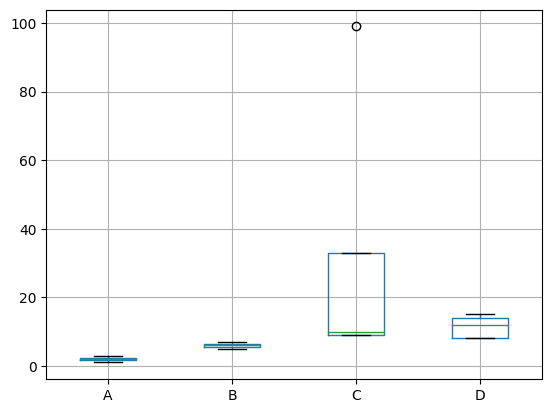

In [ ]:
boxplot = data.boxplot(column= ['A', 'B', 'C', 'D'])

In [ ]:
drop_row = data.dropna(how="all")
drop_row


,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [ ]:
fill_na = drop_row.fillna({'A':0, 'B':0, 'C':0, 'D':0})
fill_na

,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


In [ ]:
Q1 = fill_na['C'].quantile(0.25)
Q3 = fill_na['C'].quantile(0.75)
IQR = Q3-Q1
IQR

2.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

upper_limit

14.0

In [ ]:
lower_limit

6.0

In [ ]:
#trimming outliers
fill_na[fill_na['C'] > upper_limit]
#fill_na[fill_na['C'] < lower_limit]

,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,99.0,12.0


In [ ]:
new_df = fill_na[fill_na['C'] < upper_limit]
new_df

,Negara,A,B,C,D
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


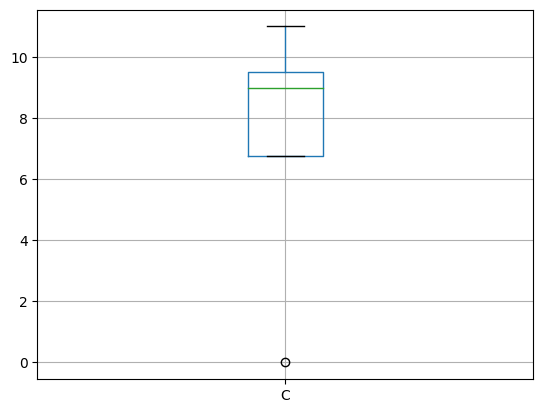

In [ ]:
boxplot = new_df.boxplot(column = 'C')

In [ ]:
new_df_cap = fill_na.copy()
new_df_cap['C'] = np.where(
    new_df_cap['C'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['C'] < lower_limit,
        lower_limit,
        new_df_cap['C']
    )
)
new_df_cap


,Negara,A,B,C,D
0,Indonsenia,1.0,5.0,14.0,12.0
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,6.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


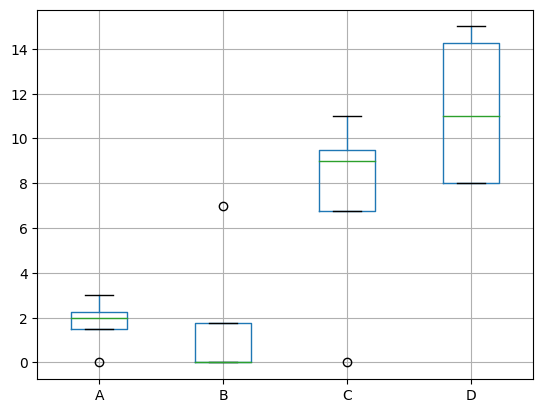

In [ ]:
boxplot = new_df.boxplot()